In [102]:
# Name: Muhammad Athar
# Roll #: 18I-0692
                                        # K-Means Clustering

import numpy as np
import pandas as pd
import math
import copy
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline

def load_and_split_dataset():
    df = pd.read_csv('Assignment3/iris.csv', header=None)
    
    return df
    
dff = load_and_split_dataset()

X = np.array(dff)

for a in range(0, 23):
    X[a] = X[a].astype(float)

In [103]:
# Average distance between cluster node and its centroid

def intra_cluster_dispersion(centroids, S, k_Meancluster1, k_Meancluster2, k_Meancluster3):
    dist_of_each_vector_with_its_own_centroid1 = [0 for i in range(k_Meancluster1.shape[1])]    # X.shape[1] = 23
    
    sum_of_squares = 0
    
    for i in range(0, k_Meancluster1.shape[0]): # # of rows of 1st cluster
        for k in range(0, k_Meancluster1.shape[1]): # 23 features of each row
            # Finding difference b.w each record with each centroid
            dist_of_each_vector_with_its_own_centroid1[k] = float(k_Meancluster1[i][k]) - float(centroids[0][k])
        
        # Finding euclidean distance with each centroid
        for l in range(0, k_Meancluster1.shape[1]):
                sum_of_squares = sum_of_squares + pow(dist_of_each_vector_with_its_own_centroid1[l], 2)
                
    avg_dist = sum_of_squares / k_Meancluster1.shape[0]
    
    S[0] = math.sqrt(avg_dist)
    
    #---------------------------------------------------
    
    dist_of_each_vector_with_its_own_centroid2 = [0 for i in range(k_Meancluster2.shape[1])]    # X.shape[1] = 23
    
    sum_of_squares = 0
    
    for i in range(0, k_Meancluster2.shape[0]): # # of rows of 1st cluster
        for k in range(0, k_Meancluster2.shape[1]): # 23 features of each row
            # Finding difference b.w each record with each centroid
            dist_of_each_vector_with_its_own_centroid2[k] = float(k_Meancluster2[i][k]) - float(centroids[1][k])
        
        # Finding euclidean distance with each centroid
        for l in range(0, k_Meancluster2.shape[1]):
                sum_of_squares = sum_of_squares + pow(dist_of_each_vector_with_its_own_centroid2[l], 2)
                
    avg_dist = sum_of_squares / k_Meancluster2.shape[0]
    
    S[1] = math.sqrt(avg_dist)
    
    #--------------------------------------------------
    
    dist_of_each_vector_with_its_own_centroid3 = [0 for i in range(k_Meancluster2.shape[1])]    # X.shape[1] = 23
    
    sum_of_squares = 0
    
    for i in range(0, k_Meancluster3.shape[0]): # # of rows of 1st cluster
        for k in range(0, k_Meancluster3.shape[1]): # 23 features of each row
            # Finding difference b.w each record with each centroid
            dist_of_each_vector_with_its_own_centroid3[k] = float(k_Meancluster3[i][k]) - float(centroids[2][k])
        
        # Finding euclidean distance with each centroid
        for l in range(0, k_Meancluster3.shape[1]):
                sum_of_squares = sum_of_squares + pow(dist_of_each_vector_with_its_own_centroid3[l], 2)
                
    avg_dist = sum_of_squares / k_Meancluster3.shape[0]
    
    S[2] = math.sqrt(avg_dist)

In [104]:
# Separation b/w Centroids of each cluster

def separation_measure(centroids, M):
    diff_of_each_col_value = [0 for i in range(centroids.shape[1])]
    
    for k in range(0, centroids.shape[1]): # 23 features of each row
        # Finding difference b.w each record with each centroid
        diff_of_each_col_value[k] = float(centroids[0][k]) - float(centroids[1][k])
    
    sum_of_squares = 0
    
    # Finding euclidean distance with each centroid
    for l in range(0, centroids.shape[1]):
        sum_of_squares = sum_of_squares + pow(diff_of_each_col_value[l], 2)
    
    # 0 0
    M[0] = 0
    
    # 0 1
    M[1] = math.sqrt(sum_of_squares)
    
    #-------------------------------
    
    for k in range(0, centroids.shape[1]): # 23 features of each row
        # Finding difference b.w each record with each centroid
        diff_of_each_col_value[k] = float(centroids[0][k]) - float(centroids[2][k])
    
    sum_of_squares = 0
    
    # Finding euclidean distance with each centroid
    for l in range(0, centroids.shape[1]):
        sum_of_squares = sum_of_squares + pow(diff_of_each_col_value[l], 2)
    
    # 0 2
    M[2] = math.sqrt(sum_of_squares)
    
    #1 0
    M[3] = M[1]
    
    #1 1
    M[4] = 0
    
    #--------------------------------
    
    for k in range(0, centroids.shape[1]): # 23 features of each row
        # Finding difference b.w each record with each centroid
        diff_of_each_col_value[k] = float(centroids[1][k]) - float(centroids[2][k])
    
    sum_of_squares = 0
    
    # Finding euclidean distance with each centroid
    for l in range(0, centroids.shape[1]):
        sum_of_squares = sum_of_squares + pow(diff_of_each_col_value[l], 2)
    
    #1 2
    M[5] = math.sqrt(sum_of_squares)
    
    # 2 0
    M[6] = M[2]
    
    # 2 1
    M[7] = M[5]
    
    # 2 2
    M[8] = 0

In [105]:
def similarity_between_clusters(S, M, R):
    k = 0
    
    for i in range(S.shape[0]):
        for j in range(S.shape[0]):
            if i != j:
                R[k] = (S[i] + S[j]) / M[k]
            
            k+=1

In [106]:
def find_most_similar_cluster(noofclusters, R, r):
    a = 0
    
    for l in range(0, noofclusters):
        max = -100
        
        for m in range(0, noofclusters):
            if l != m:
                if R[a] > max:
                    r[l] = R[a]
                    max = R[a]
            
            a+=1

In [107]:
def find_db_index(N, r):
    db_index = -10
    
    sum = 0
    
    for i in range(N):
        sum = sum + r[i]
        
    db_index = sum / N
    
    return db_index

In [108]:
# Assign every training example x^(i) to its closest centroid, given the current centroid positions
def find_closest_centroids(X, centroids):
    '''returns the array of assigned clusters to each example ''' 
    m = X.shape[0] # no of rows in dataset - 5456
    k = centroids.shape[0]  #division size - 4 / # of clusters
    idx = np.zeros(m) # array to assign the centriod
    
    # Your Code Here
    dist_with_each_centroid_feature = [[0 for i in range(X.shape[1])] for j in range(k)]    # X.shape[1] = 23    k = 4
    
    dist_with_each_centroid = [0 for j in range(k)]
    
    for i in range(0, m): # 5456 rows of dataset
        for j in range(0, centroids.shape[0]): # 4 rows of randomly selected centroids
            for k in range(0, X.shape[1]): # 23 features of each row
                # Finding difference b.w each record with each centroid
                dist_with_each_centroid_feature[j][k] = float(X[i][k]) - float(centroids[j][k])
        
        # Finding euclidean distance with each centroid
        for l in range(0, centroids.shape[0]):
            sum_of_squares = 0
            for z in range(0, centroids.shape[1]):
                sum_of_squares = sum_of_squares + pow(dist_with_each_centroid_feature[l][z], 2)
                
            dist_with_each_centroid[l] = math.sqrt(sum_of_squares)
    
        cluster_no = 0
        
        # Finding minimum euclidean distance
        benchmark = dist_with_each_centroid[0]
        
        for a in range(1, centroids.shape[0]):
            if dist_with_each_centroid[a] < benchmark:
                benchmark = dist_with_each_centroid[a]
                cluster_no = a
        
        # Identifying that to which cluster record belongs
        idx[i] = cluster_no
            
    return idx

# Update Centroids
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))  #4x23
    '''Return Updated Values of all K centroids'''
    
    cluster_count = [0 for j in range(k)]
    
    # Your Code Here
    # Finding count of records in each cluster
    for i in range(0, len(idx)):
        if idx[i] == 0:
            cluster_count[0]+=1
        elif idx[i] == 1:
            cluster_count[1]+=1
        elif idx[i] == 2:
            cluster_count[2]+=1
        elif idx[i] == 3:
            cluster_count[3]+=1
    
    # Adding values of each cluster
    for i in range(0, n): #23
        for j in range(0, m): #5456
            if idx[j] == 0:
                centroids[0][i]+=X[j][i]
                
            elif idx[j] == 1:
                centroids[1][i]+=X[j][i]
                
            elif idx[j] == 2:
                centroids[2][i]+=X[j][i]
                
            elif idx[j] == 3:
                centroids[3][i]+=X[j][i]
    
    # Dividing with number of records in each cluster
    for i in range(0, k):
        for j in range(0, n):
            if cluster_count[i] != 0:
                centroids[i][j] = centroids[i][j] / cluster_count[i]
    
    return centroids

# 5456
# 23
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape      # m: # of rows in dataset     #n: # of features/columns in the dataset
    k = initial_centroids.shape[0]    # k = # of centroids
    idx = np.zeros(m)  # for maitaining that in which class the record lies
    centroids = initial_centroids
    
    for i in range(max_iters):
        # find closest centroid
        idx = find_closest_centroids(X, centroids)
        #update centroids
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

np.random.shuffle(X)
#cluster1 = X[0:1364,:]
#cluster2 = X[1364:2728,:]
#cluster3 = X[2728:4092,:]
#cluster4 = X[4092:5456,:]

cluster1 = X[0:50,:]
cluster2 = X[50:100,:]
cluster3 = X[100:150,:]

#initial_centroids = np.array([X[random.randint(0, 1364)], X[random.randint(1364, 2728)], X[random.randint(2728, 4092)], X[random.randint(4092, 5456)]])

initial_centroids = np.array([X[random.randint(0,50)], X[random.randint(50,100)], X[random.randint(100,150)]])

# Select k=4 , pick 4 random centroids from data
idx, centroids = run_k_means(X, initial_centroids, 20)    # use 2000 iterations to perform clustering#

In [109]:
                                            # Visualization

#k_Meancluster1 = X[np.where(idx == 0)[0],:]
#k_Meancluster2 = X[np.where(idx == 1)[0],:]
#k_Meancluster3 = X[np.where(idx == 2)[0],:]
#k_Meancluster4 = X[np.where(idx == 3)[0],:]

k_Meancluster1 = X[np.where(idx == 0)[0],:]
k_Meancluster2 = X[np.where(idx == 1)[0],:]
k_Meancluster3 = X[np.where(idx == 2)[0],:]

In [110]:
S = np.zeros(centroids.shape[0])
M = np.zeros(9)
R = np.zeros(9)
r = np.zeros(centroids.shape[0])

intra_cluster_dispersion(centroids, S, k_Meancluster1, k_Meancluster2, k_Meancluster3)

separation_measure(centroids, M)

similarity_between_clusters(S, M, R)

find_most_similar_cluster(centroids.shape[0], R, r)

db_index = find_db_index(centroids.shape[0], r)

print("DB Index: ", db_index)

DB Index:  0.7258704796232439


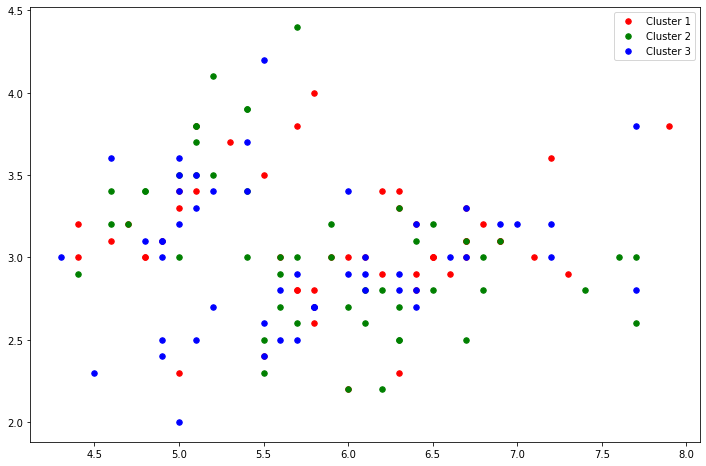

In [111]:
fig, ax = plt.subplots(figsize=(12, 8))

#ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
#ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
#ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
#ax.scatter(cluster4[:,0], cluster4[:,1], s=30, color='k', label='Cluster 4')

ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')

ax.legend()

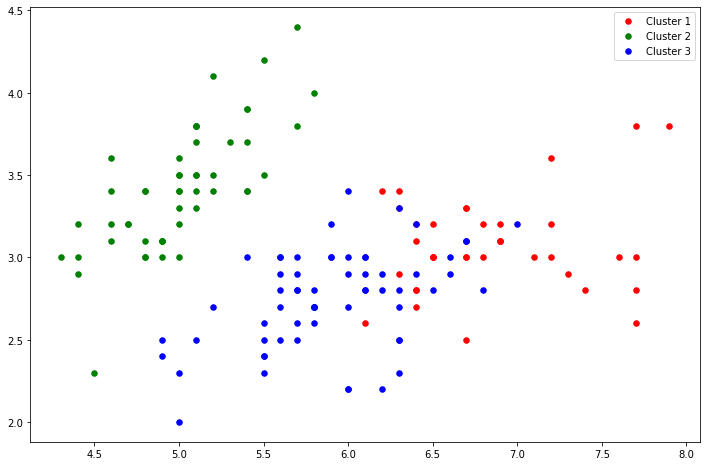

In [112]:
fig, ax = plt.subplots(figsize=(12,8))

#ax.scatter(k_Meancluster1[:,0], k_Meancluster1[:,1], s=30, color='r', label='Cluster 1')
#ax.scatter(k_Meancluster2[:,0], k_Meancluster2[:,1], s=30, color='g', label='Cluster 2')
#ax.scatter(k_Meancluster3[:,0], k_Meancluster3[:,1], s=30, color='b', label='Cluster 3')
#ax.scatter(k_Meancluster4[:,0], k_Meancluster4[:,1], s=30, color='k', label='Cluster 4')

ax.scatter(k_Meancluster1[:,0], k_Meancluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(k_Meancluster2[:,0], k_Meancluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(k_Meancluster3[:,0], k_Meancluster3[:,1], s=30, color='b', label='Cluster 3')

ax.legend()